# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [106]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

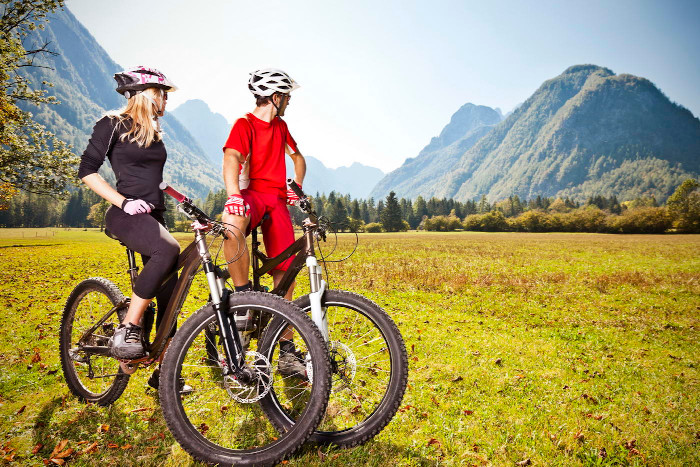

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [109]:
data = pd.read_csv('day.csv', parse_dates=[0])
train, test = train_test_split(data, test_size=0.2)
train

C:\Users\pinma\AppData\Local\Temp\ipykernel_28272\2045784196.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('day.csv', parse_dates=[0])


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
63       64  2011-03-05       1   0     3        0        6           0   
642     643  2012-10-04       4   1    10        0        4           1   
715     716  2012-12-16       4   1    12        0        0           0   
330     331  2011-11-27       4   0    11        0        0           0   
416     417  2012-02-21       1   1     2        0        2           1   
..      ...         ...     ...  ..   ...      ...      ...         ...   
157     158  2011-06-07       2   0     6        0        2           1   
689     690  2012-11-20       4   1    11        0        2           1   
579     580  2012-08-02       3   1     8        0        4           1   
424     425  2012-02-29       1   1     2        0        3           1   
294     295  2011-10-22       4   0    10        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
63            2  0.384167  0.378779  0.789167   0.251871     640        1437   
642           2  0.657500  0.607975  0.722917   0.117546     891        6437   
715           2  0.362500  0.369938  0.838750   0.100742     538        3248   
330           1  0.459167  0.455800  0.698333   0.208954     810        2261   
416           1  0.287826  0.295113  0.594348   0.205717     163        3614   
..          ...       ...       ...       ...        ...     ...         ...   
157           1  0.707500  0.655950  0.597917   0.187808     763        4070   
689           2  0.374167  0.380667  0.685000   0.082725     534        5100   
579           1  0.752500  0.707088  0.659583   0.129354     983        6278   
424           2  0.344348  0.348470  0.804783   0.179117      65        1769   
294           1  0.422500  0.425492  0.629167   0.092667    1499        2809   

      cnt  
63   2077  
642  7328  
715  3786  
330  3071  
416  3777  
..    ...  
157  4833  
689  5634  
579  7261  
424  1834  
294  4308  

[584 rows x 16 columns]

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

In [110]:
categorial_features = ['season', 'holiday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

Рассмотрим зависимости вещественных признаков от целевого.

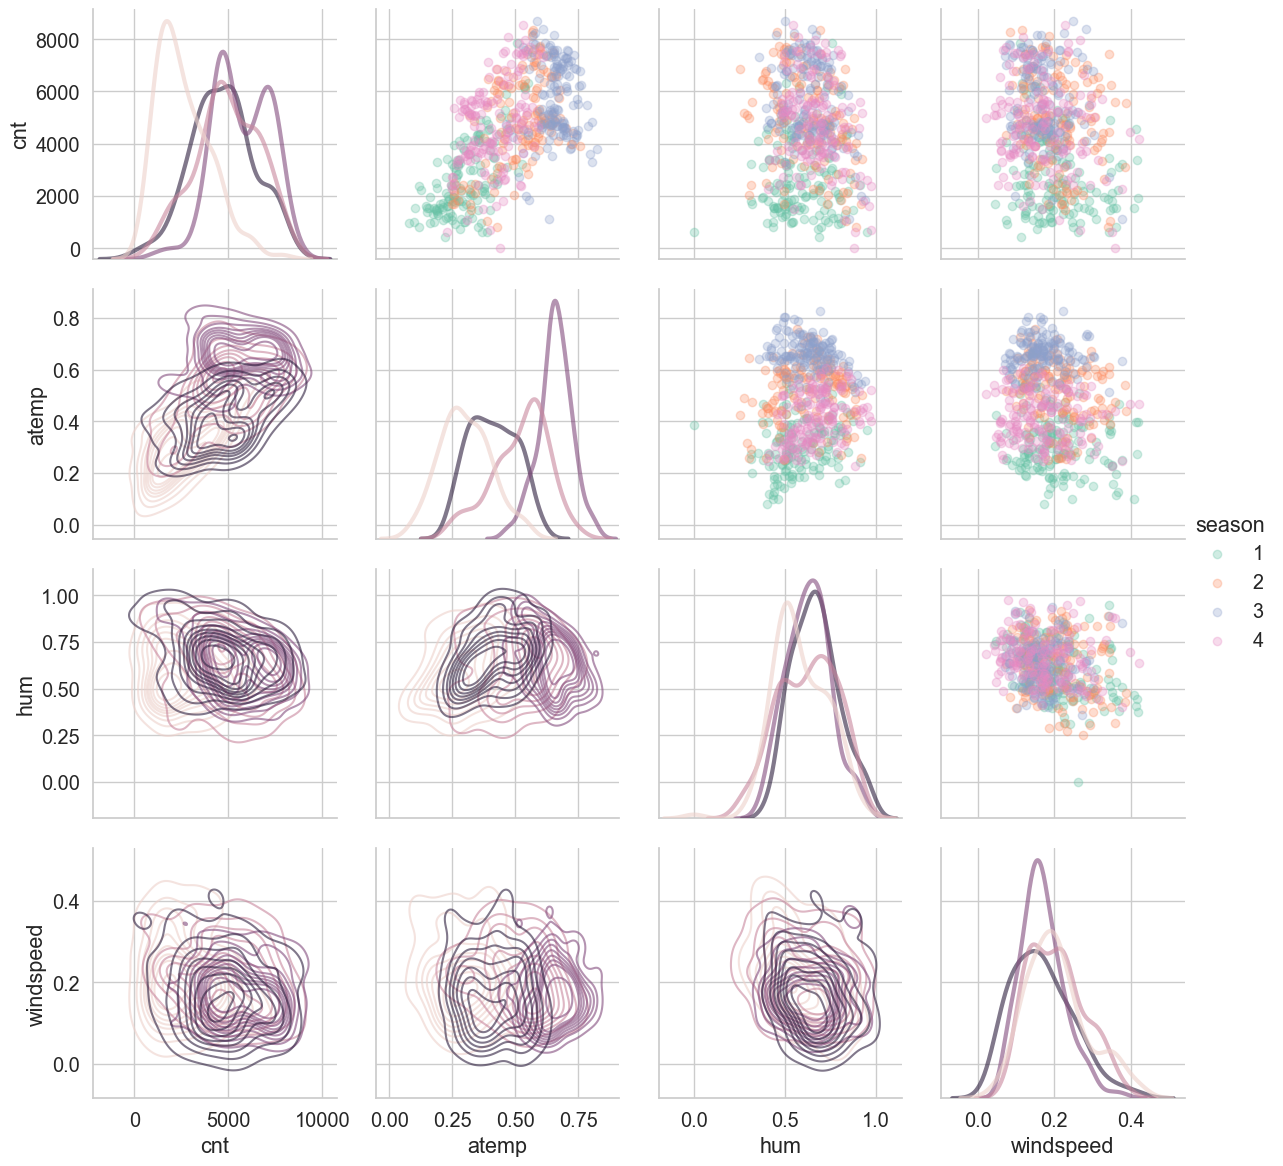

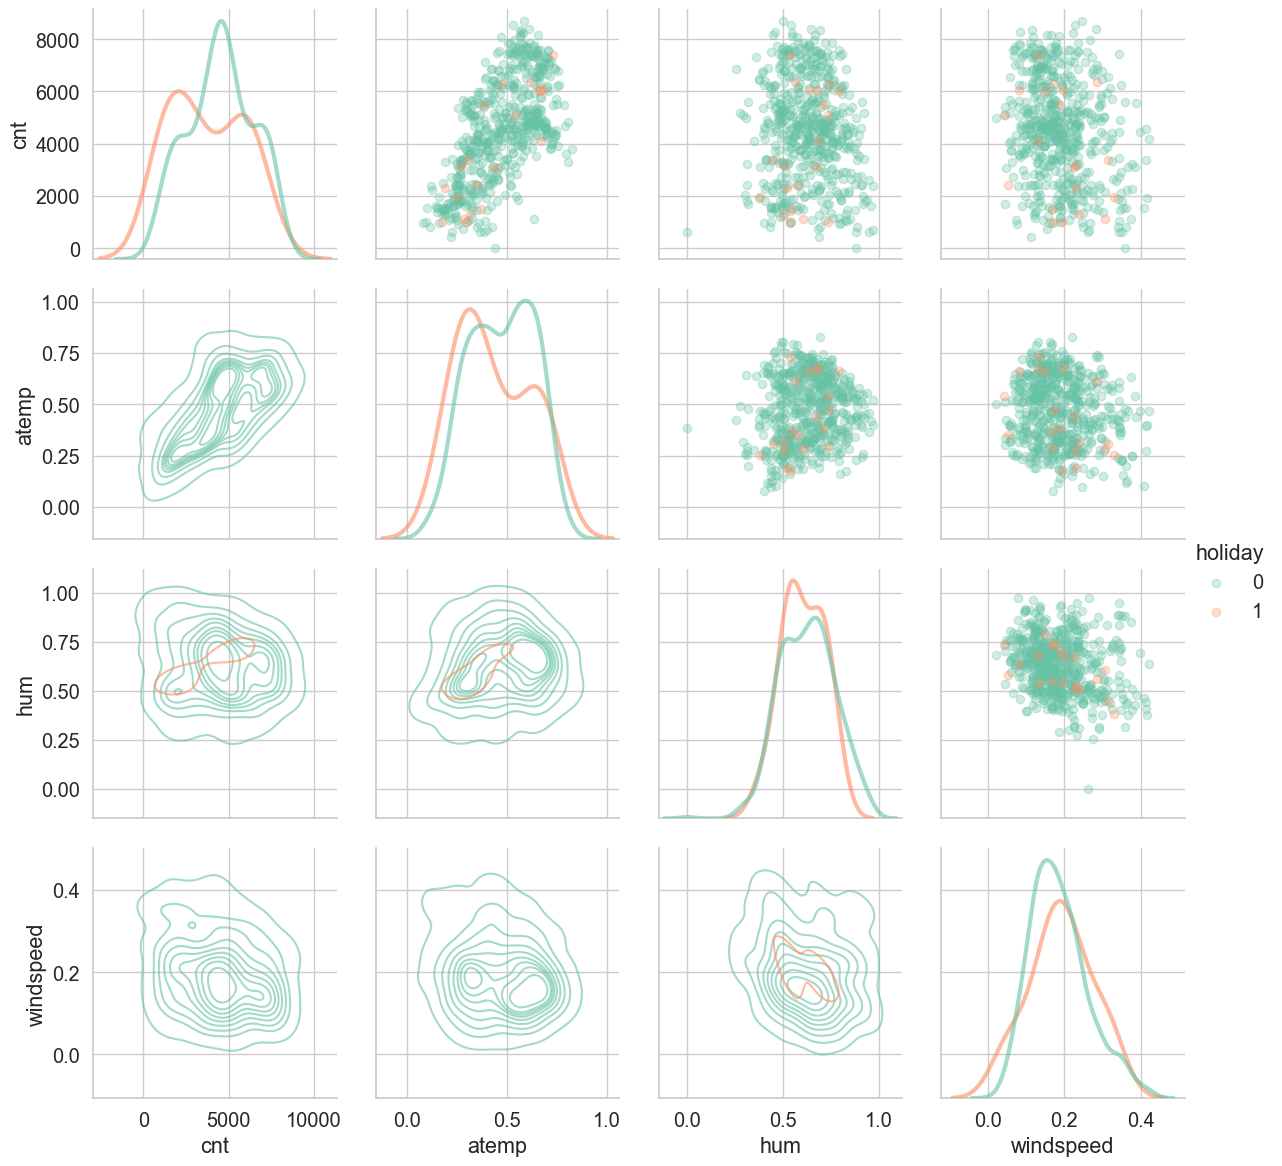

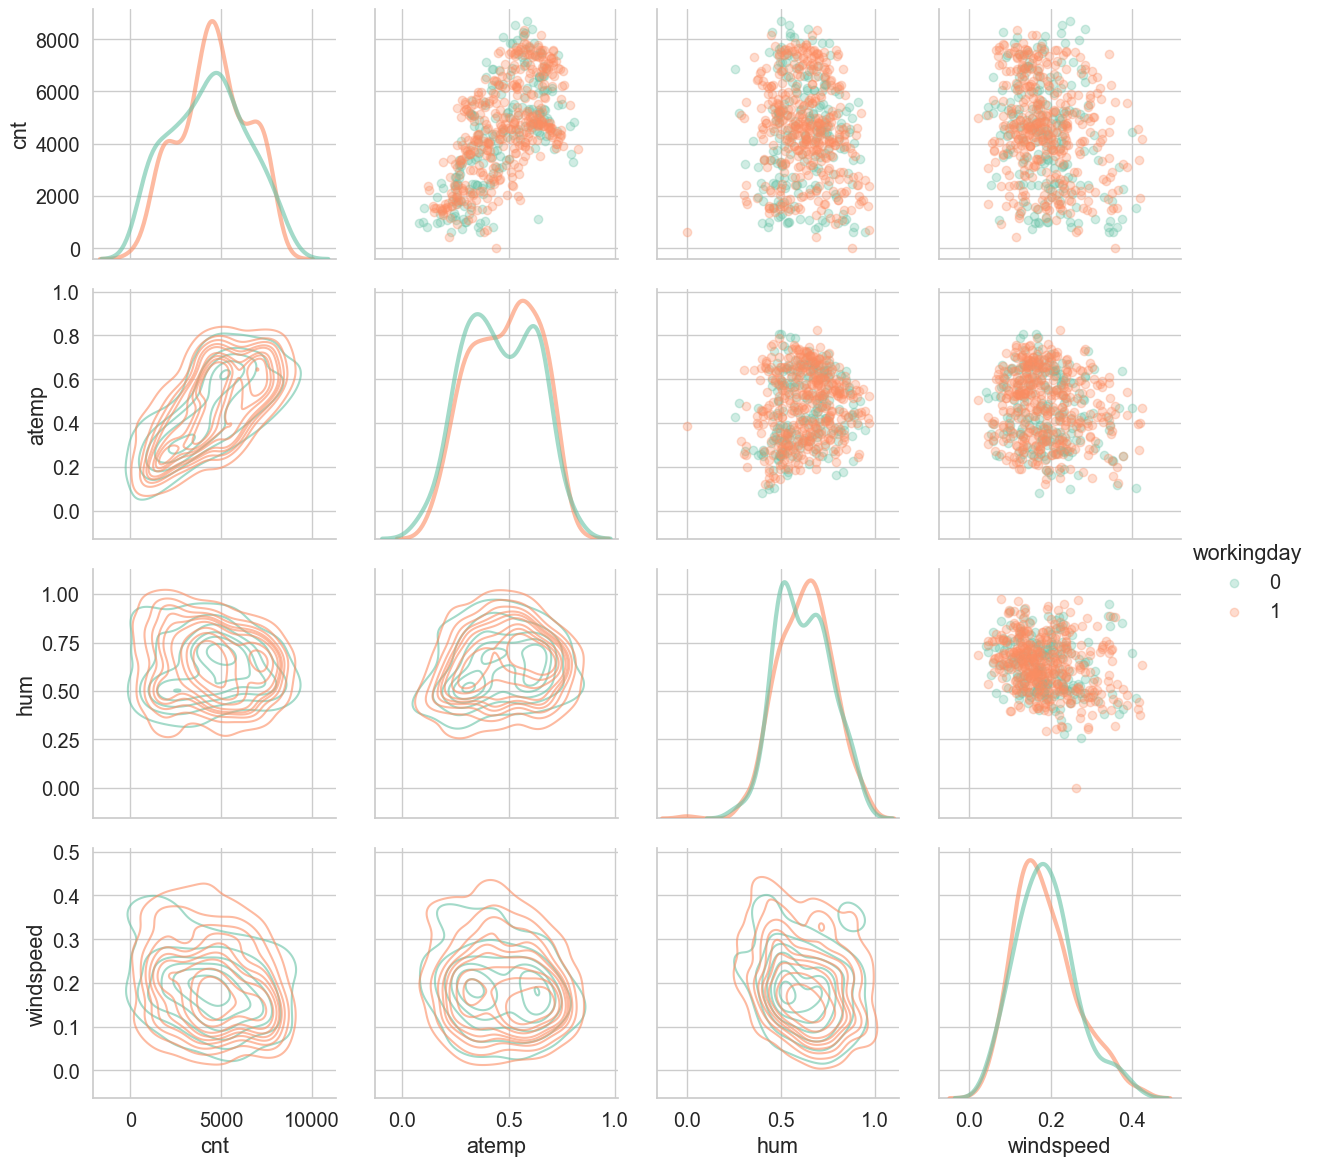

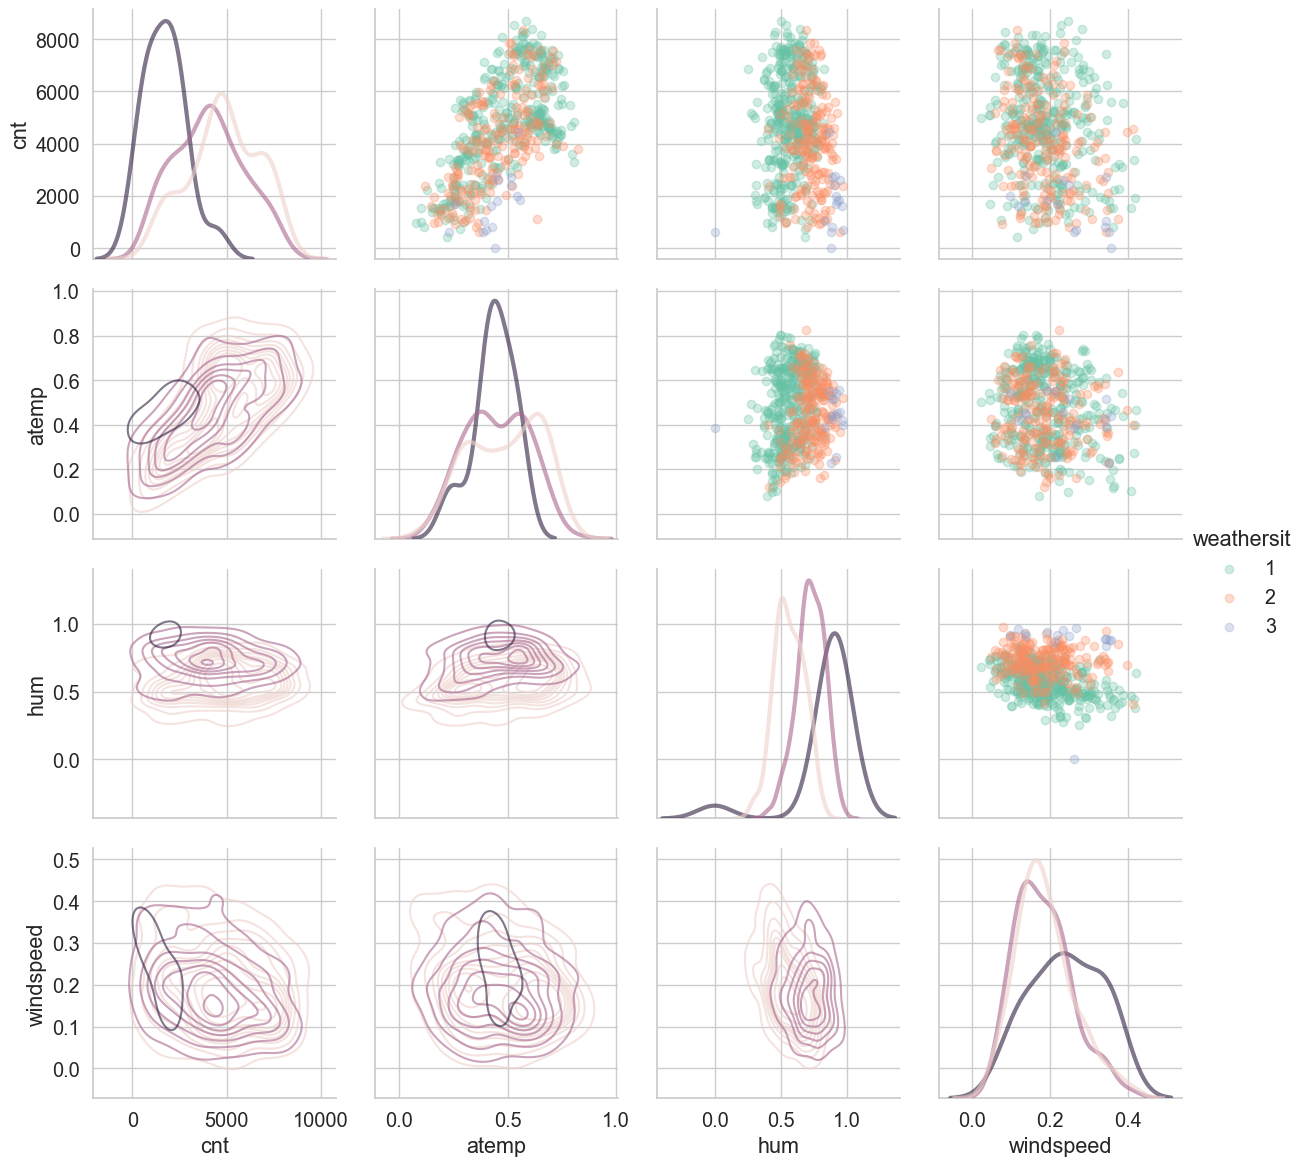

In [111]:
for hue in categorial_features:
    g = sns.PairGrid(train[['cnt', 'atemp', 'hum', 'windspeed', hue]], 
                     hue=hue, diag_sharey=False, height=3)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

Для понимания характера зависимости между целевым и вещественными признаками нарисуем более понятный график для каждого отдельного признака. Для этого округлим значения величин и найдем для каждого значения признака среднее число велосипедов и изобразим это на графике.

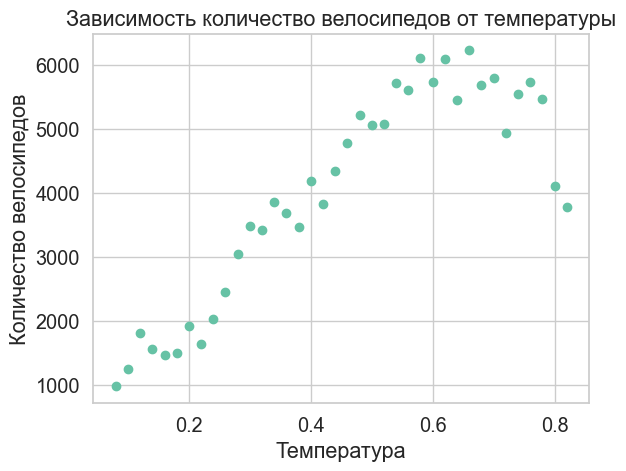

In [112]:
train['rounded_temp'] = (train['atemp'] * 50).round() / 50
mean_temp = train.groupby('rounded_temp')['cnt'].aggregate(['mean'])
plt.scatter(mean_temp.index, mean_temp['mean'])
plt.title('Зависимость количество велосипедов от температуры')
plt.xlabel('Температура')
plt.ylabel('Количество велосипедов')
plt.show()

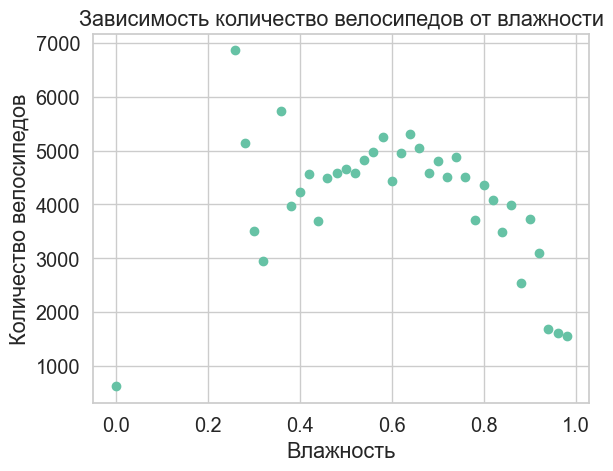

In [113]:

train['rounded_hum'] = (train['hum'] * 50).round() / 50
mean_temp = train.groupby('rounded_hum')['cnt'].aggregate(['mean'])
plt.scatter(mean_temp.index, mean_temp['mean'])
plt.title('Зависимость количество велосипедов от влажности')
plt.xlabel('Влажность')
plt.ylabel('Количество велосипедов')
plt.show()

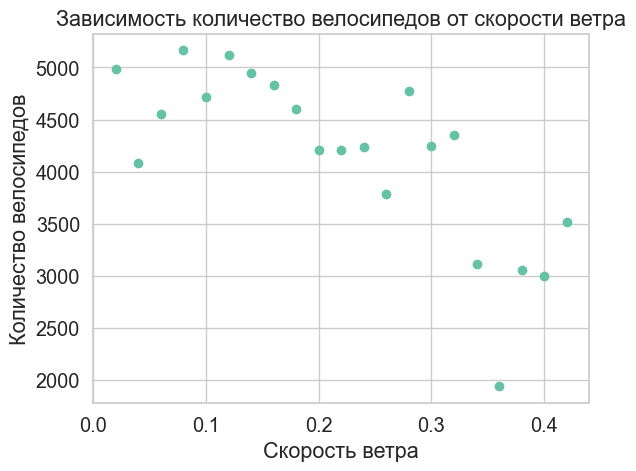

In [114]:

train['rounded_windspeed'] = (train['windspeed'] * 50).round() / 50
mean_temp = train.groupby('rounded_windspeed')['cnt'].aggregate(['mean'])
plt.scatter(mean_temp.index, mean_temp['mean'])
plt.title('Зависимость количество велосипедов от скорости ветра')
plt.xlabel('Скорость ветра')
plt.ylabel('Количество велосипедов')
plt.show()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



На графиках с влажностью и скоростью ветра наблюдаются явные выбросы, а также на графике с температурой наблюдаются не большие выбросы.

Для определения необходимости рассмотрения нелинейных функций от признаков можно внимательно рассмотреть графики и понять:
1. Если график имеет не линейный характер, то имеет смысл рассмотреть какие-то нелинейные признаки, например если график имеет логарифмический характер можно рассмотреть логарифм
2. Также имеет смысл рассмотреть индикаторы если есть явные границы или пороговые значения, после которых происходит изменение в отношении целевой переменной.



**Выводы по графикам:**

По графику температуры видно, что она имеет линейный характер однако после примерно 0.6 температура перестает влиять на целевой признак, так что можно ее домножить на I(x>0.6). По графику влажности трудно сказать какая зависимость, а по графику скорости ветра зависимость похожа на логарифмическую.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Для начала отбросим выбросы и оставим только температуру при x не больше 0.6, так как на графике было видно, что при x до 0.6 температура вела себя линейно, после начала падать. Для параметра windspeed применим функцию логарифм. Применим для категориальных признаков onehotencoder

Реализуйте данную процедуру.

In [115]:
for col in real_features:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]


train['atemp'] = train['atemp'].apply(lambda x: 0 if x > 0.6 else x)
train['windspeed'] = train['windspeed'].apply(np.log)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [116]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем
print(model.intercept_)
model.coef_

2140.0170588439687


array([ 2338.5350575 , -1680.03787589,  -527.82815692,  2261.42214219,
        3561.287775  ,  2001.18586416,  -314.66389436,   163.73227588,
        -471.84176149, -3220.98195254])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [117]:
for col in real_features:
    Q1 = test[col].quantile(0.25)
    Q3 = test[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    test = test[(test[col] >= lower_bound) & (test[col] <= upper_bound)]

test_cat = encoder.transform(test[categorial_features])
# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])
test_preds = model.predict(X_test)
np.sqrt(((test[target_feature] - test_preds) ** 2).mean())

1643.4231610875693

In [118]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1321.2443305722813

In [119]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
mean_absolute_percentage_error(test[target_feature], test_preds)

37.33852569088027

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [120]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
Y_train = train['cnt']
coefs = (np.linalg.inv(X_train.T @ X_train)) @ X_train.T @ Y_train
coefs

array([ 2140.01705884,  2338.5350575 , -1680.03787589,  -527.82815692,
        2261.42214219,  3561.287775  ,  2001.18586416,  -314.66389436,
         163.73227588,  -471.84176149, -3220.98195254])

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Ошибки в оценки коэффициентов не было. Коэффициенты получились такие же как и в моделе обученной до этого, а значит все ошибки предсказаний по всем метрикам будут тоже такими же.

Сделайте выводы.

Построив графики, мы исследовали значимость всех признаков от целевого и получили нужные зависимости для линейной регрессии. Также мы выбросили выбросы, которые могли помешать нам построить правильную модель. И получили довольно точную модель в которой 30% ошибок.

**Выводы:**

После написания модели линейной регрессии мы получили 30% и это довольно точная модель. Мы исследовали зависимости целевых признаков от всех остальных и поняли, что иногда важно рассматривать какие-то нелинейные функции от признаков для улучшения модели. В данной модели очень важно было отбросить все выбросы, чтобы улучшить модель.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

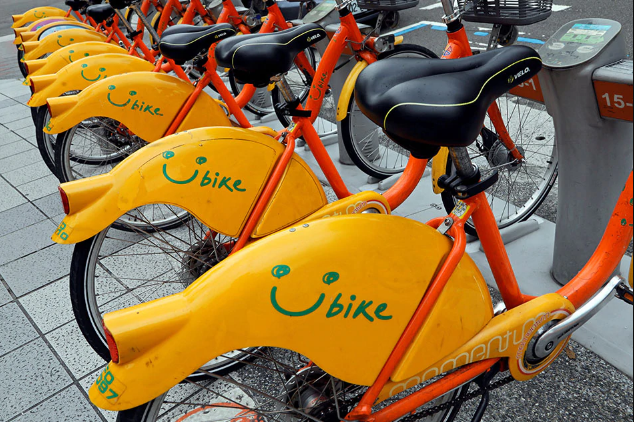

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [121]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        self.coefs_ = None        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        if(self.fit_intercept):
            X_modified = np.hstack([np.ones((X.shape[0], 1)), X])
        else:
            X_modified = X
        I = np.identity(X_modified.shape[1])
        self.coefs_ = (np.linalg.inv((X_modified.T @ X_modified) + self.lambd * I)) @ X_modified.T @ Y
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        if(self.fit_intercept):
            X_modified = np.hstack([np.ones((X.shape[0], 1)), X])
        else:
            X_modified = X
        predictions = X_modified @ self.coefs_
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [122]:
train, test = train_test_split(data, test_size=0.4)
valid, test = train_test_split(test, test_size=0.5)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

 Напишим функции для стандартизации значений, удаления выбросов и подготовки категориальных признаков. Стандартизировать будем способом StandartScaler.

In [123]:
def standardize_column(column):
    mean = column.mean()
    variance = column.var()
    standardized_column = (column - mean) / (variance**0.5)
    return standardized_column

def remove_outliers(data):
    for col in real_features:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

def data_prepare(data):
    data_cat = encoder.transform(data[categorial_features])
    X = np.hstack([data[real_features], data_cat])
    return X

train = remove_outliers(train)
valid = remove_outliers(valid)
test = remove_outliers(test)

for col in real_features:
    train[col] = standardize_column(train[col])
    valid[col] = standardize_column(valid[col])
    test[col] = standardize_column(test[col])

X_train = data_prepare(train)
X_valid = data_prepare(valid)
X_test = data_prepare(test)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [124]:
lambdas = np.logspace(-2, 3, 100)
models = []

for lambd in lambdas:
    ridge_model = RidgeRegression(lambd=lambd)
    ridge_model.fit(X_train, train[target_feature])
    models.append(ridge_model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [125]:
rmse_train, rmse_valid = [], []
mae_train, mae_valid = [], []
mape_train, mape_valid = [], []

for model in models:
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    rmse_train.append(np.sqrt(((train[target_feature] - train_preds) ** 2).mean()))
    rmse_valid.append(np.sqrt(((valid[target_feature] - valid_preds) ** 2).mean()))
    mae_train.append(metrics.mean_absolute_error(train[target_feature], train_preds))
    mae_valid.append(metrics.mean_absolute_error(valid[target_feature], valid_preds))
    mape_train.append(mean_absolute_percentage_error(train[target_feature], train_preds))
    mape_valid.append(mean_absolute_percentage_error(valid[target_feature], valid_preds))

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

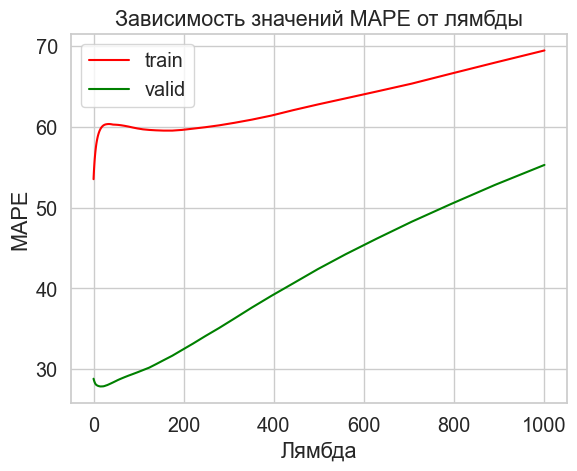

In [126]:
plt.plot(lambdas, mape_train, '-r', label='train')
plt.plot(lambdas, mape_valid, '-g', label='valid')
plt.title('Зависимость значений MAPE от лямбды')
plt.xlabel('Лямбда')
plt.ylabel('MAPE')
plt.legend()
plt.show()

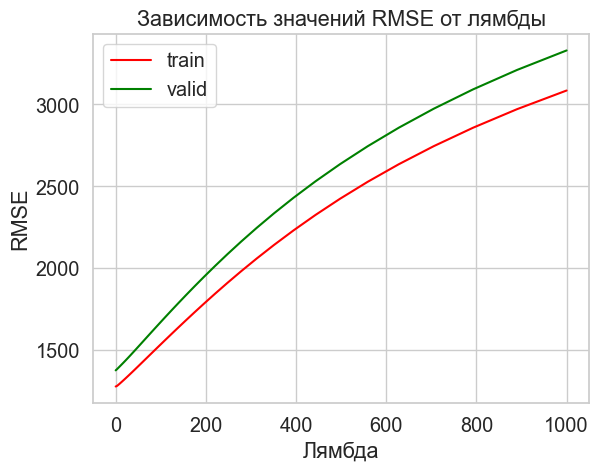

In [127]:
plt.plot(lambdas, rmse_train, '-r',label='train')
plt.plot(lambdas, rmse_valid, '-g', label='valid')
plt.title('Зависимость значений RMSE от лямбды')
plt.xlabel('Лямбда')
plt.ylabel('RMSE')
plt.legend()
plt.show()

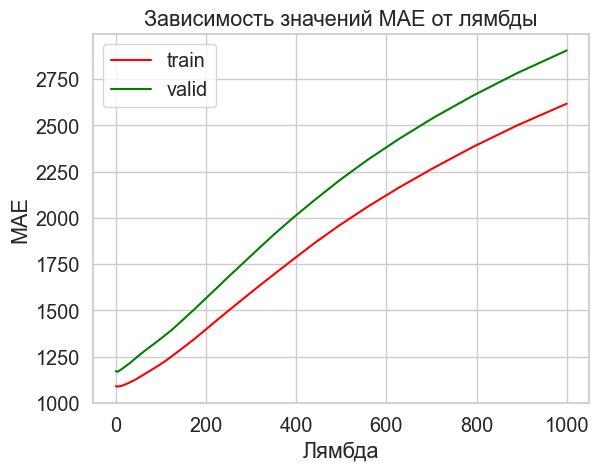

In [128]:
plt.plot(lambdas, mae_train, '-r',label='train')
plt.plot(lambdas, mae_valid, '-g', label='valid')
plt.title('Зависимость значений MAE от лямбды')
plt.xlabel('Лямбда')
plt.ylabel('MAE')
plt.legend()
plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

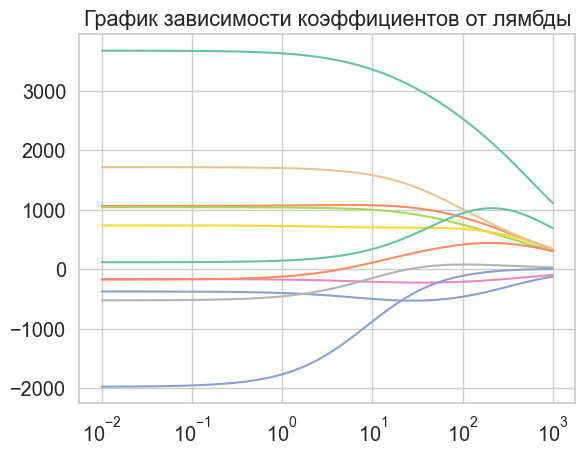

In [129]:
for i in range(0,11):
    plt.plot(lambdas, [a.coefs_[i] for a in models])
plt.xscale('log')
plt.title('График зависимости коэффициентов от лямбды')
plt.show()

По графикам видно, что все лямбды стремятся к 0, а это как раз и ожидалось увидеть из формулы коэффициентов ridge-регрессии.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [130]:
lambd = 10
final_model = RidgeRegression(lambd=lambd)
final_model.fit(X_train, train[target_feature])
test_preds = final_model.predict(X_test)
np.sqrt(((test[target_feature] - test_preds) ** 2).mean())

1260.009384662494

In [131]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1040.5773739310923

In [132]:
mean_absolute_percentage_error(test[target_feature], test_preds)

31.519040768276795

Сделайте выводы.

Ridge модель выдает хуже оценки для train_data, но лучше для valid_data. Также по графику коэффициентов видно, что при лямбда стремящемся к бесконечности они стремятся к 0, что и ожидалось из формулы коэффициентов.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

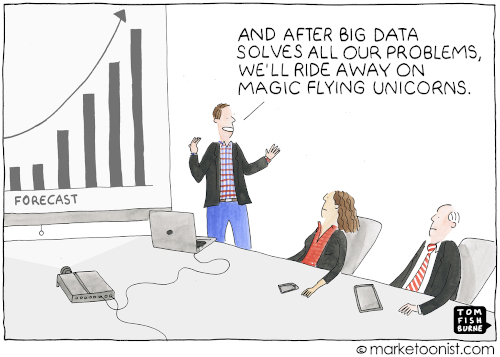

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [133]:
coefs = np.zeros((11,1))
eta = 0.005
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
X_valid = np.hstack([np.ones((X_valid.shape[0], 1)), X_valid])
Y_train = train[target_feature].values.reshape(-1, 1)

Стандартизация данных была проведена до этого, в предыдущей задаче.

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [134]:
rmse_train, rmse_valid = [], []
mae_train, mae_valid = [], []
mape_train, mape_valid = [], []

N = 50

for i in range(N):
    sample_indices = np.random.choice(train.shape[0], 128, replace=True)
    coefs = coefs - eta*(X_train[sample_indices].T @ ((X_train[sample_indices] @ coefs) - Y_train[sample_indices]) + lambd*coefs)
    train_preds = X_train @ coefs
    valid_preds = X_valid @ coefs
    #сделаем из двумерных массивов одномерные
    train_preds = train_preds.flatten()
    valid_preds = valid_preds.flatten()
    rmse_train.append(np.sqrt(((train[target_feature] - train_preds) ** 2).mean()))
    rmse_valid.append(np.sqrt(((valid[target_feature] - valid_preds) ** 2).mean()))
    mae_train.append(metrics.mean_absolute_error(train[target_feature], train_preds))
    mae_valid.append(metrics.mean_absolute_error(valid[target_feature], valid_preds))
    mape_train.append(mean_absolute_percentage_error(train[target_feature], train_preds))
    mape_valid.append(mean_absolute_percentage_error(valid[target_feature], valid_preds))

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Пришлось совершить 50 итераций, однако по графику видно, что метрики стабилизируется намного раньше.

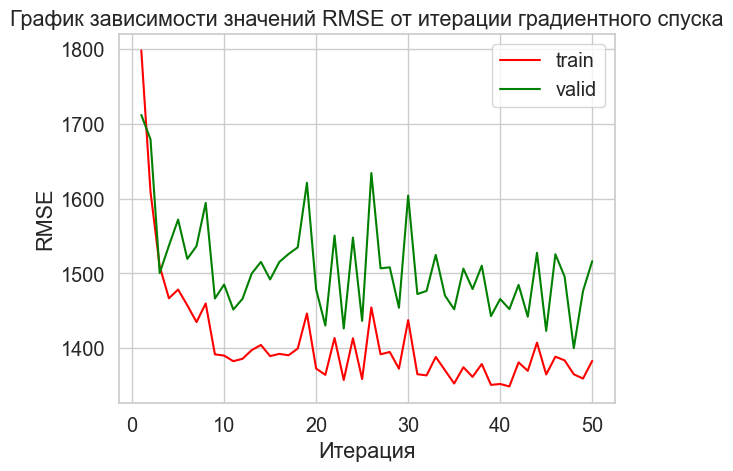

In [141]:
plt.plot(np.arange(1, N+1),  rmse_train, '-r', label='train')
plt.plot(np.arange(1, N+1), rmse_valid, '-g', label='valid')
plt.title('График зависимости значений RMSE от итерации градиентного спуска')
plt.xlabel('Итерация')
plt.ylabel('RMSE')
plt.legend()
plt.show()

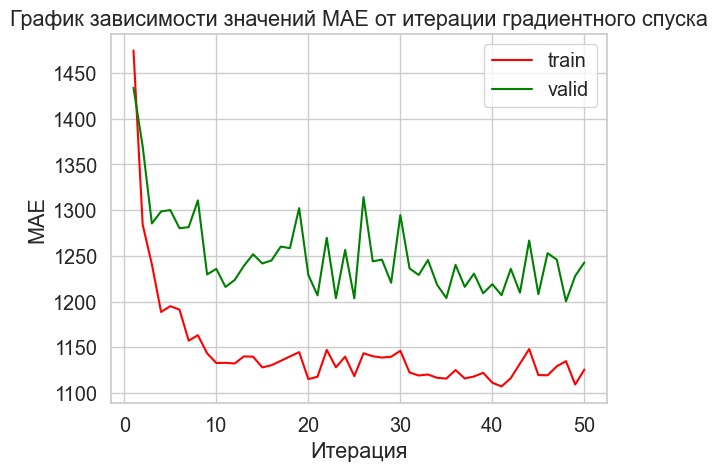

In [142]:
plt.plot(np.arange(1, N+1),  mae_train, '-r', label='train')
plt.plot(np.arange(1, N+1), mae_valid, '-g', label='valid')
plt.title('График зависимости значений MAE от итерации градиентного спуска')
plt.xlabel('Итерация')
plt.ylabel('MAE')
plt.legend()
plt.show()

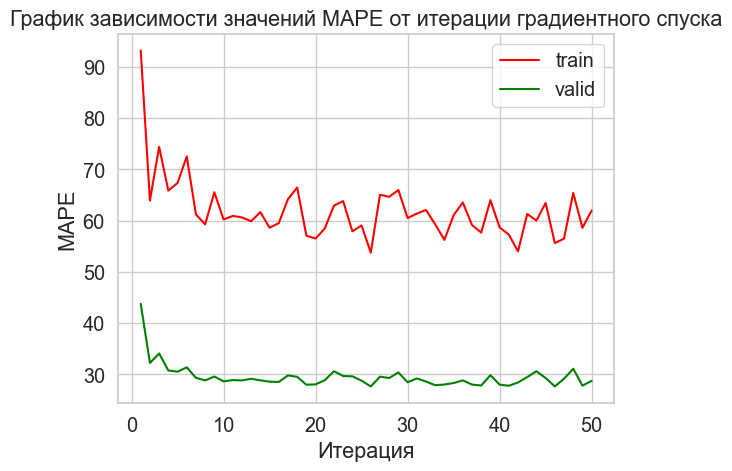

In [144]:
plt.plot(np.arange(1, N+1),  mape_train, '-r', label='train')
plt.plot(np.arange(1, N+1), mape_valid, '-g', label='valid')
plt.title('График зависимости значений MAPE от итерации градиентного спуска')
plt.xlabel('Итерация')
plt.ylabel('MAPE')
plt.legend()
plt.show()

Посчитайте ошибку на тестовой выборке.

In [138]:
test_preds = X_test @ coefs
test_preds = test_preds.flatten()
np.sqrt(((test[target_feature] - test_preds) ** 2).mean())

1321.3114972816359

In [139]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1042.7509832119229

In [140]:
mean_absolute_percentage_error(test[target_feature], test_preds)

31.536427184453448

Сделайте выводы.

Методом градиентного спуска мы получили довольно точную модель. При градиентном спуске важно подобрать значения шага итерации, так как иначе коэффициенты просто будут возрастать при большем числе итераций и это нам ничего не даст.